# EXPLORATORY DATA ANALYSIS 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("churn-bigml-20.csv")

In [3]:
# Displaying the first 5 rows
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89  

In [4]:
# Displaying basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [5]:
# Checking for missing values
print(df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [6]:
# Summary statistics for numeric columns
print("Summary statistics for numerical features:\n")
print(df.describe())

Summary statistics for numerical features:

       Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std 

In [7]:

# Summary statistics for categorical columns
print("\nSummary statistics for categorical features:\n")
print(df.describe(include=['object']))


Summary statistics for categorical features:

       State International plan Voice mail plan
count    667                667             667
unique    51                  2               2
top       AZ                 No              No
freq      19                614             478


In [8]:
# Checking unique values for some key categorical columns
print("\nUnique values in 'State':", df['State'].unique())
print("Unique values in 'International plan':", df['International plan'].unique())
print("Unique values in 'Voice mail plan':", df['Voice mail plan'].unique())


Unique values in 'State': ['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']
Unique values in 'International plan': ['No' 'Yes']
Unique values in 'Voice mail plan': ['No' 'Yes']


### Data Visualization

In [9]:
# Setting up a consistent style
sns.set(style="whitegrid", palette="muted")

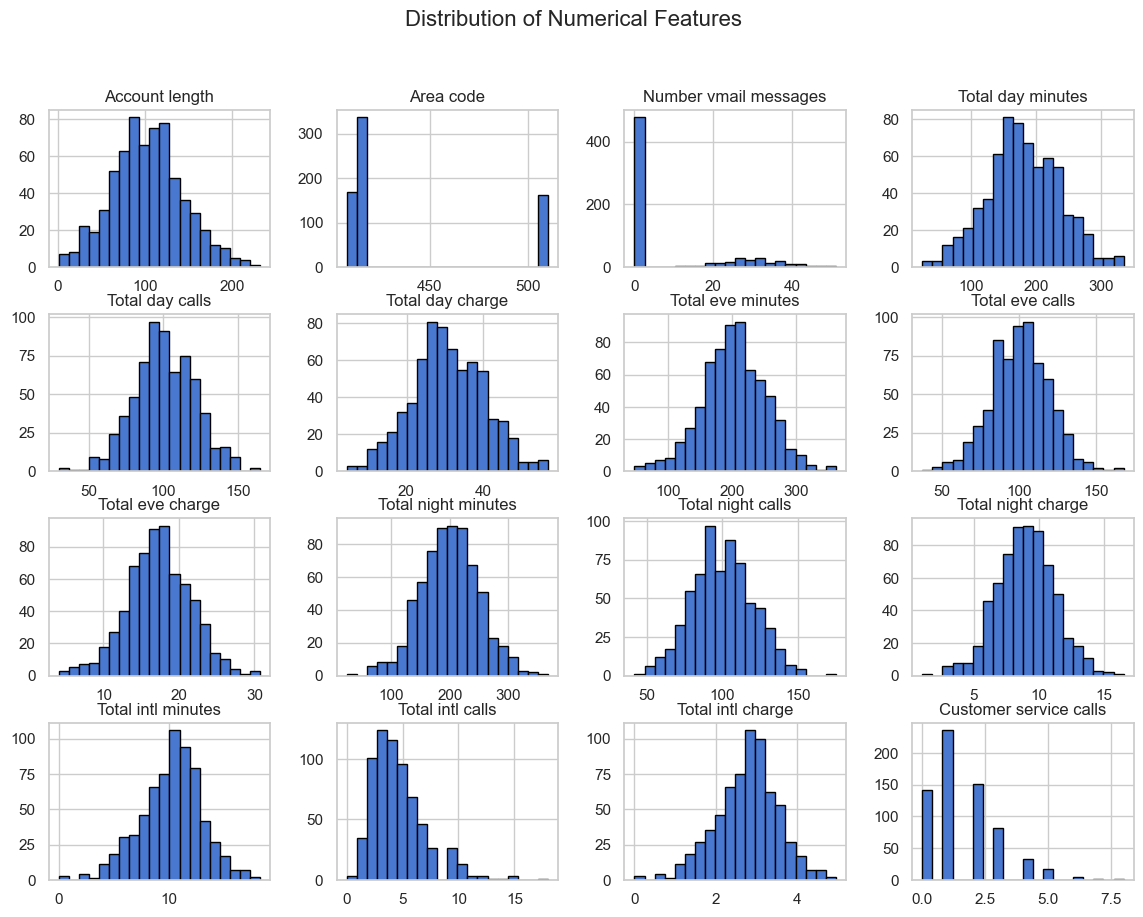

In [10]:
# HISTOGRAMS
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

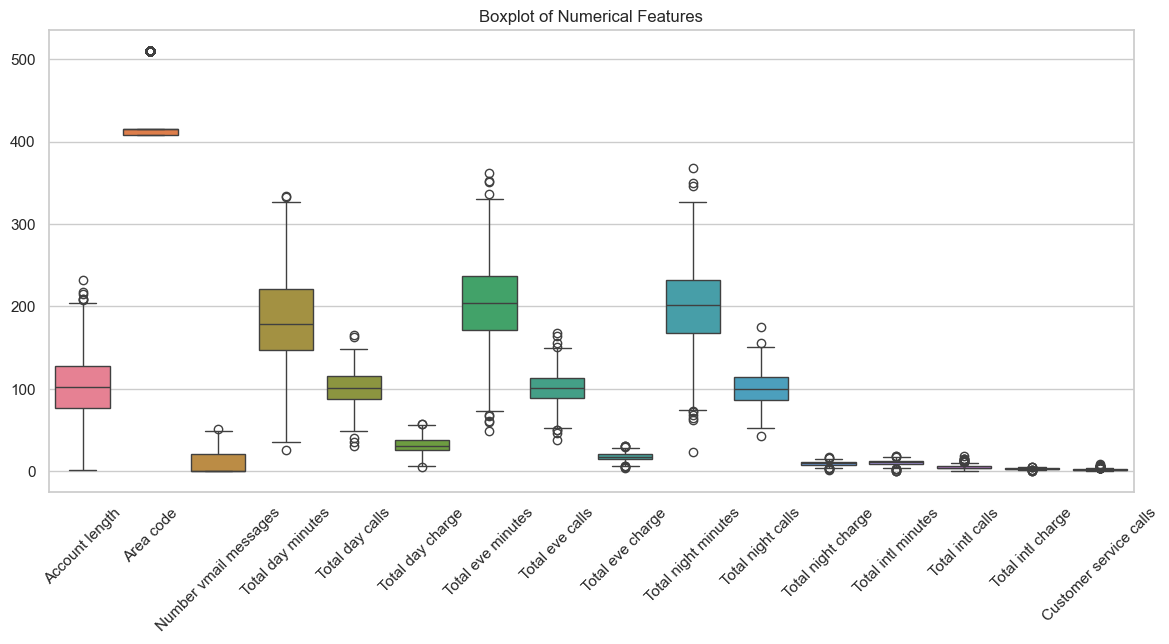

In [11]:
# BOX PLOTS 
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

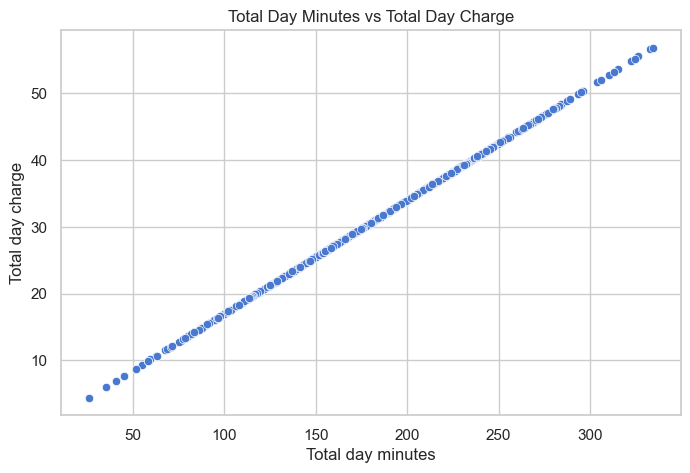

In [12]:
# SCATTER PLOTS 
# Example: Relationship between 'Total day minutes' and 'Total day charge'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total day minutes', y='Total day charge', data=df)
plt.title("Total Day Minutes vs Total Day Charge")
plt.show()

In [13]:
# Computing the correlation matrix for numerical variables
corr = df.corr(numeric_only=True)
print("Correlation Matrix:\n")
print(corr)

Correlation Matrix:

                        Account length  Area code  Number vmail messages  \
Account length                1.000000  -0.026327              -0.011993   
Area code                    -0.026327   1.000000              -0.006907   
Number vmail messages        -0.011993  -0.006907               1.000000   
Total day minutes             0.017833   0.051507              -0.069172   
Total day calls               0.035703  -0.008972              -0.009952   
Total day charge              0.017839   0.051492              -0.069187   
Total eve minutes             0.027043   0.017160               0.040865   
Total eve calls               0.021237   0.017783              -0.051951   
Total eve charge              0.027051   0.017182               0.040876   
Total night minutes          -0.007527  -0.016832               0.039751   
Total night calls             0.027228   0.036421               0.003367   
Total night charge           -0.007528  -0.016818               0.0

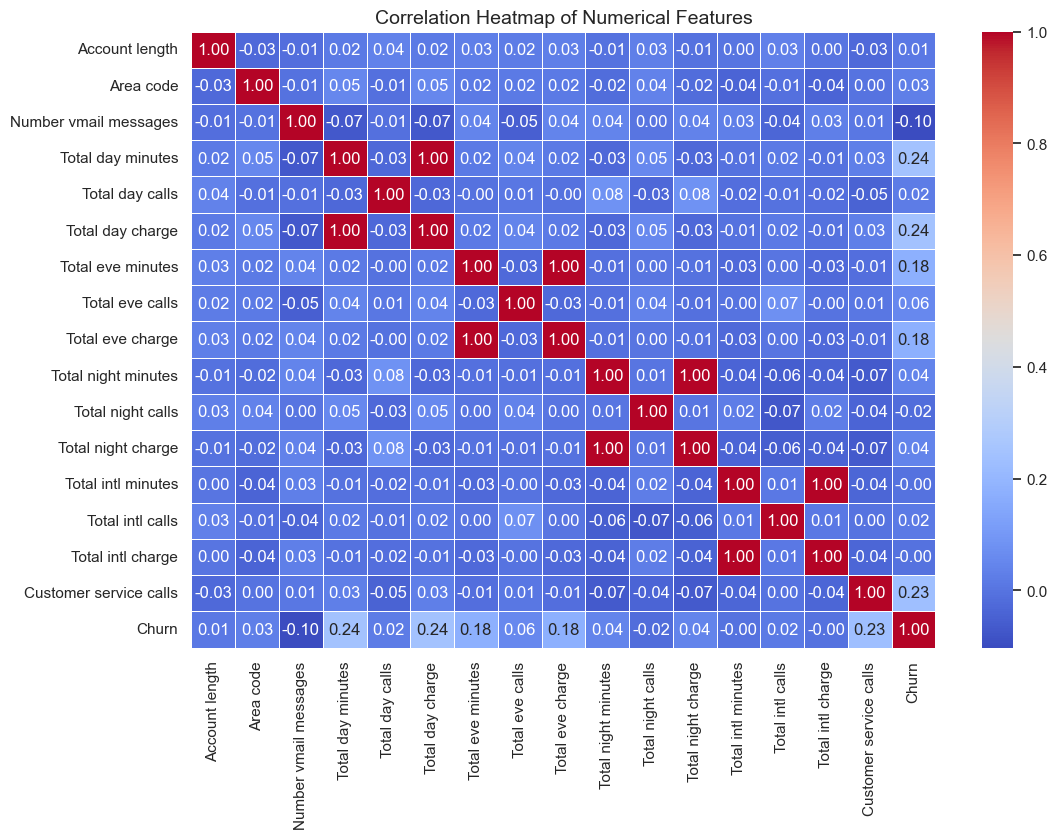

In [14]:
# CORRELATION HEATMAP
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()